In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
df.shape

(200, 5)

In [ ]:
df=df.drop('CustomerID',axis=1)
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [ ]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [ ]:
df['Genre']=df['Genre'].map({'Male':1,'Female':0})
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [ ]:
x=df[['Genre','Age','Annual Income (k$)','Spending Score (1-100)']]

In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
   km=KMeans(n_clusters=i,n_init=20)
   km.fit(x)
   css=km.inertia_
   print('Clusters=',i,"wcss= ",css)
   wcss.append(css)

Clusters= 1 wcss=  308862.06000000006
Clusters= 2 wcss=  212889.44245524303
Clusters= 3 wcss=  143391.59236035676
Clusters= 4 wcss=  104414.67534220168
Clusters= 5 wcss=  75399.61541401484
Clusters= 6 wcss=  58348.641363315044
Clusters= 7 wcss=  51167.19736842104
Clusters= 8 wcss=  44355.31351771351
Clusters= 9 wcss=  40674.1545505049
Clusters= 10 wcss=  37489.16347342312


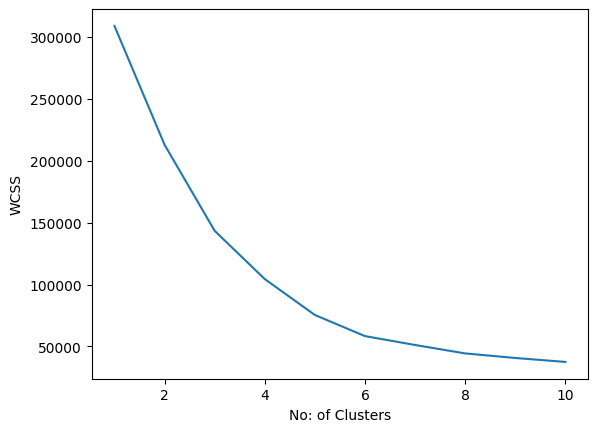

In [ ]:
plt.plot(range(1,11),wcss)
plt.xlabel('No: of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
km=KMeans(n_clusters=5,n_init=20)
km.fit(x)
cluster_labels=km.predict(x)

In [ ]:
cluster_labels

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int32)

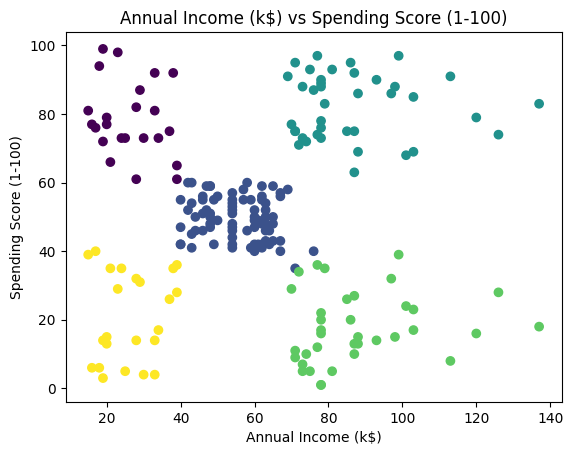

In [ ]:
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'],c=cluster_labels)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income (k$) vs Spending Score (1-100)')
plt.show()

In [ ]:
df['clusters']=cluster_labels

In [ ]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,19,15,39,4
1,1,21,15,81,0
2,0,20,16,6,4
3,0,23,16,77,0
4,0,31,17,40,4
